In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



In [122]:
data = {'A': [1, 2, np.inf, 4, np.nan],
        'B': [5, np.inf, 7, 8, 9],
        'C': [-np.inf, 12, 13, np.nan, 15]}

In [123]:
df = pd.DataFrame(data)

In [124]:
df

,A,B,C
0,1.0,5.0,-inf
1,2.0,inf,12.0
2,inf,7.0,13.0
3,4.0,8.0,NaN
4,NaN,9.0,15.0


In [125]:
inf_values = df.isin([np.inf, np.nan, -np.inf])

In [126]:
inf_values

,A,B,C
0,False,False,True
1,False,True,False
2,True,False,False
3,False,False,True
4,True,False,False


In [127]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [128]:
df

,A,B,C
0,1.0,5.0,NaN
1,2.0,NaN,12.0
2,NaN,7.0,13.0
3,4.0,8.0,NaN
4,NaN,9.0,15.0


In [129]:
filled_df = df.fillna(0)

In [130]:
filled_df

,A,B,C
0,1.0,5.0,0.0
1,2.0,0.0,12.0
2,0.0,7.0,13.0
3,4.0,8.0,0.0
4,0.0,9.0,15.0


In [131]:
data = {'Category': ['A', 'B', 'A', 'B'],
        'Value': [10, 20, 30, 40]}
df = pd.DataFrame(data)

In [132]:
df

,Category,Value
0,A,10
1,B,20
2,A,30
3,B,40


In [133]:
grouped = df.groupby('Category').sum()

In [134]:
grouped

,Value
Category,
A,40
B,60


In [135]:
grouped_fixed = df.groupby(('Category')).sum()

In [136]:
grouped_fixed

,Value
Category,
A,40
B,60


In [137]:
housing_data=pd.read_csv("housing_data.csv")

In [138]:
rename_col = {'LotConfig':'Lot_configuration','BldgType':'Type_of_dwelling',
              'RoofMatl':'Roof_material','MasVnrType':'Masonry_veneer_type',
              'Electrical':'Electrical_system','LowQualFinSF':'Low_quality_finished_square_feet',
              'KitchenQual':'Kitchen_Quality','GarageType':'Garage_location',
              'GarageCond':'Garage_condition','PavedDrive':'Paved driveway',
              'PoolQC':'Pool_quality','Fence':'Fence_Quality',
              'MiscFeature':'Miscellaneous_feature','MiscVal':'miscellaneous_feature'}

In [139]:
housing_data=housing_data.rename(columns=rename_col)
housing_data.head(2)

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,Pool_quality,Fence_Quality,Miscellaneous_feature,miscellaneous_feature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500


In [140]:
housing_data.dropna(subset=['Electrical_system'], inplace=True)
housing_data.dropna(subset=['GarageYrBlt'], inplace=True)

In [141]:
housing_data[['Electrical_system','GarageYrBlt']].isnull().sum()

Electrical_system    0
GarageYrBlt          0
dtype: int64

In [142]:
housing_data=housing_data.drop(['Alley','Masonry_veneer_type','Unnamed: 0'], axis=1)

In [143]:
housing_data['GarageYrBlt']=housing_data['GarageYrBlt'].replace(to_replace=np.nan,value=0).astype('int64')

In [144]:
inf_values = housing_data.isin([np.inf, np.nan, -np.inf])

In [145]:
housing_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [146]:
cleaned_housing_data = housing_data.fillna(0)

In [147]:
cleaned_housing_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,Lot_configuration,LandSlope,...,PoolArea,Pool_quality,Fence_Quality,Miscellaneous_feature,miscellaneous_feature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,SC20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,SC60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,SC70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,SC60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,SC60,RL,62,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,SC20,RL,85,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,SC70,RL,66,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,SC20,RL,68,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


In [148]:
grouped = cleaned_housing_data.groupby('MSSubClass').sum()

In [149]:
grouped

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,Lot_configuration,LandSlope,Neighborhood,...,PoolArea,Pool_quality,Fence_Quality,Miscellaneous_feature,miscellaneous_feature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,,,,,,,,,,,,,,,,,,,,,
SC120,RMRLRLRLRMRLRLRLRMRLRLRMRLRLRLRMRLRLRLRMRLRLRL...,3060,468404,PavePavePavePavePavePavePavePavePavePavePavePa...,RegRegRegIR1RegRegIR1RegRegRegRegIR1RegRegIR1R...,LvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlHLSLvlLvlLvlL...,AllPubAllPubAllPubAllPubAllPubAllPubAllPubAllP...,InsideInsideInsideInsideFR2InsideInsideInsideI...,GtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlModGtlGtlGtlG...,MeadowVNridgHtNridgHtNridgHtMitchelSawyerWNPkV...,...,0,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoMnPrvMnP...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,0,JunAugFebOctMarMarFebAugJanMarMayDecAprJulMayJ...,174680,WDWDWDWDWDWDWDWDWDNewWDWDConLwWDConWDWDNewWDWD...,NormalNormalNormalNormalNormalNormalNormalNorm...,17467780
SC160,FVFVFVRMRLFVRMRLRMRMRMRMRLFVRMRLRMRMRMRMRMRLFV...,1495,166845,PavePavePavePavePavePavePavePavePavePavePavePa...,RegRegRegRegIR1RegRegRegRegRegRegRegRegIR1RegR...,LvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlL...,AllPubAllPubAllPubAllPubAllPubAllPubAllPubAllP...,InsideCornerCornerInsideInsideInsideInsideFR2I...,GtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlG...,SomerstSomerstSomerstEdwardsStoneBrSomerstEdwa...,...,0,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,0,AugJunJunAprJunJunMayJulMaySepJunAugAprJunAprO...,122477,WDNewWDWDWDWDWDWDCODWDWDWDWDNewWDWDWDCODWDWDWD...,AbnormlPartialNormalNormalNormalNormalNormalNo...,8546285
SC180,RMRMRMRMRMRM,168,15624,PavePavePavePavePavePave,RegRegRegRegRegReg,LvlLvlLvlLvlLvlLvl,AllPubAllPubAllPubAllPubAllPubAllPub,InsideInsideInsideInsideInsideInside,GtlGtlGtlGtlGtlGtl,MeadowVEdwardsMeadowVMeadowVEdwardsEdwards,...,0,NoNoNoNoNoNo,GdWoNoNoNoNoNo,NoNoNoNoNoNo,0,NovJunMayAprJunMay,12047,WDWDWDWDNewWD,NormalNormalNormalNormalPartialNormal,690000
SC190,RLC (all)RMRLRMRLRLRLRMRMRLRLRLRLRMRLRLRLRMRMRM,1330,414930,PavePavePavePavePaveGrvlPavePavePavePavePavePa...,RegRegRegRegRegIR1RegRegRegRegRegRegRegRegRegR...,LvlLvlLvlLvlLvlHLSBnkLvlLvlLvlLvlLvlLvlLvlLvlL...,AllPubAllPubAllPubAllPubAllPubAllPubAllPubAllP...,CornerCornerInsideCornerInsideCornerInsideCorn...,GtlGtlGtlGtlGtlSevGtlGtlGtlGtlGtlGtlGtlGtlGtlG...,BrkSideOldTownOldTownCrawforOldTownTimberGilbe...,...,0,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo,NoNoNoNoMnPrvNoNoNoNoMnPrvNoNoNoNoNoMnPrvNoNoM...,NoNoNoNoNoShedNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo,700,JanNovAprJunMayAugJanMayNovMayMayAprMarAugSepJ...,42160,WDWDWDWDWDWDWDConLDWDWDWDWDConLDConLDWDWDWDWDW...,NormalNormalNormalNormalNormalNormalNormalNorm...,2798750
SC20,RLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRL...,33072,6164950,PavePavePavePavePavePavePavePavePavePavePavePa...,RegRegRegIR2IR1IR1IR1RegRegRegIR1RegRegRegIR1I...,LvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlL...,AllPubAllPubAllPubAllPubAllPubAllPubAllPubAllP...,FR2InsideInsideInsideInsideCornerCulDSacInside...,GtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlG...,VeenkerSomerstSawyerSawyerCollgCrNAmesNAmesSaw...,...,648,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoNoNoGdWoNoNoMnPrvNoMnPrvNoNoNoNoMnPrvNoN...,NoNoNoNoNoNoShedNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,28284,MayAugFebSepAugMayMarJunMaySepMayJulMayMayDecJ...,1046102,WDWDWDWDNewWDWDWDCODWDWDWDWDWDWDWDWDWDWDWDWDWD...,NormalNormalNormalNormalPartialNormalNormalNor...,97676149
SC30,RMRMRLRLRMRMRMRMRMRMRLRMRMRLRMRLRMRMRMRLRLRLRL...,2820,426533,PavePavePavePavePavePavePavePavePavePavePavePa...,IR1RegIR1RegRegRegRegRegIR3RegIR1RegRegRegRegR...,LvlLvlHLSLvlLvlLvlLvlLvlBnkLvlLvlLvlLvlLvlLvlL...,AllPubAllPubAllPubAllPubAllPubAllPubAllPubAllP...,InsideCornerInsideCornerInsideCornerCornerInsi...,GtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlG...,BrkSideOldTownCrawforEdwardsOldTownBrkS

In [150]:
cleaned_housing_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,Lot_configuration,LandSlope,...,PoolArea,Pool_quality,Fence_Quality,Miscellaneous_feature,miscellaneous_feature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,SC20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,SC60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,SC70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,SC60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,SC60,RL,62,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,SC20,RL,85,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,SC70,RL,66,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,SC20,RL,68,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


In [151]:
exclude_housing_data=cleaned_housing_data.select_dtypes(exclude=['object'])

In [152]:
exclude_housing_data

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,miscellaneous_feature,YrSold,SalePrice
0,65,8450,7,5,2003,2003,196,706,0,150,...,548,0,61,0,0,0,0,0,2008,208500
1,80,9600,6,8,1976,1976,0,978,0,284,...,460,298,0,0,0,0,0,0,2007,181500
2,68,11250,7,5,2001,2002,162,486,0,434,...,608,0,42,0,0,0,0,0,2008,223500
3,60,9550,7,5,1915,1970,0,216,0,540,...,642,0,35,272,0,0,0,0,2006,140000
4,84,14260,8,5,2000,2000,350,655,0,490,...,836,192,84,0,0,0,0,0,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62,7917,6,5,1999,2000,0,0,0,953,...,460,0,40,0,0,0,0,0,2007,175000
1456,85,13175,6,6,1978,1988,119,790,163,589,...,500,349,0,0,0,0,0,0,2010,210000
1457,66,9042,7,9,1941,2006,0,275,0,877,...,252,0,60,0,0,0,0,2500,2010,266500
1458,68,9717,5,6,1950,1996,0,49,1029,0,...,240,366,0,112,0,0,0,0,2010,142125


In [153]:
groupedA = exclude_housing_data.groupby('LotFrontage').sum()

In [154]:
groupedA

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,miscellaneous_feature,YrSold,SalePrice
LotFrontage,,,,,,,,,,,,,,,,,,,,,
0,3344206,1522,1427,497770,499931,27820,132668,16348,117337,266353,...,123145,30361,12765,4525,1224,3940,738,32880,505988,46349099
21,29649,90,92,33514,33581,3773,4530,273,4521,9324,...,4665,1009,157,0,0,0,0,0,34137,1646900
24,43431,121,101,37765,37770,2626,5915,1107,7935,14957,...,8412,1321,450,0,0,0,0,0,38150,2759300
30,27323,40,30,11943,12024,76,731,1057,2798,4586,...,2953,0,768,0,0,216,0,0,12045,962885
32,27709,33,25,9991,9991,996,4583,0,1769,6352,...,2072,122,641,0,0,0,0,0,10035,933500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,15623,10,5,1996,1996,0,2096,0,300,2396,...,813,171,78,0,0,0,555,0,2007,745000
168,23257,7,5,2006,2006,0,0,0,868,868,...,422,0,100,0,0,0,0,0,2006,274725
174,40557,16,9,3913,3986,506,1725,184,913,2822,...,1605,0,162,754,0,0,512,0,4015,638000


In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

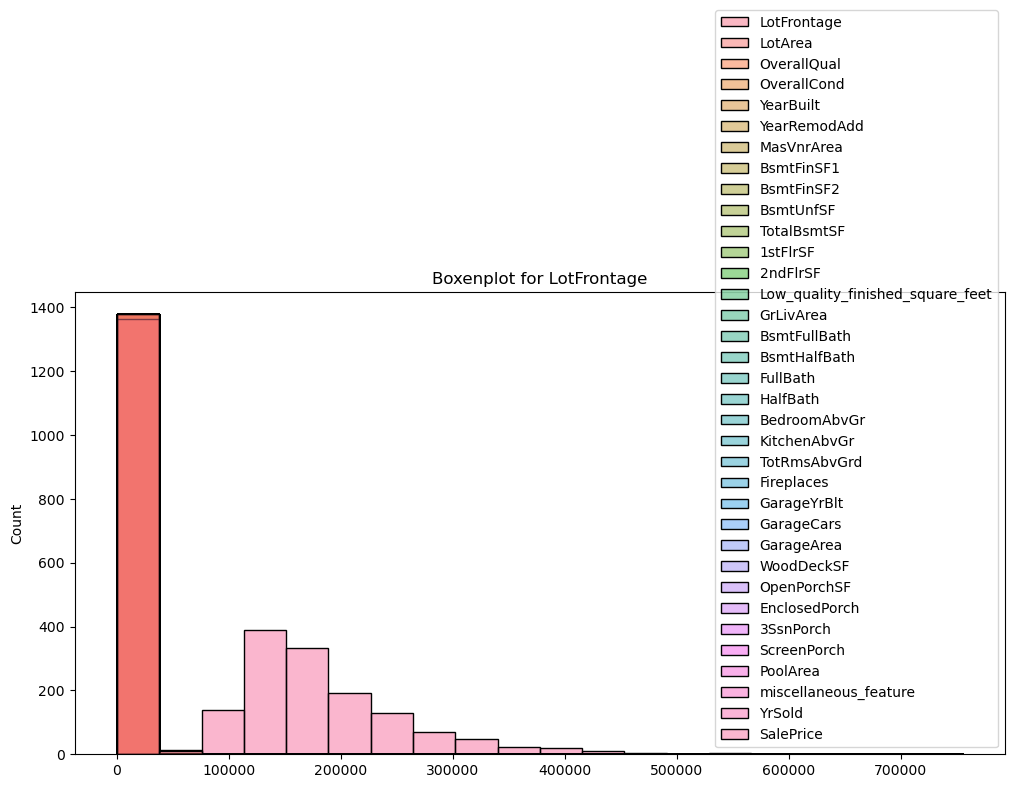

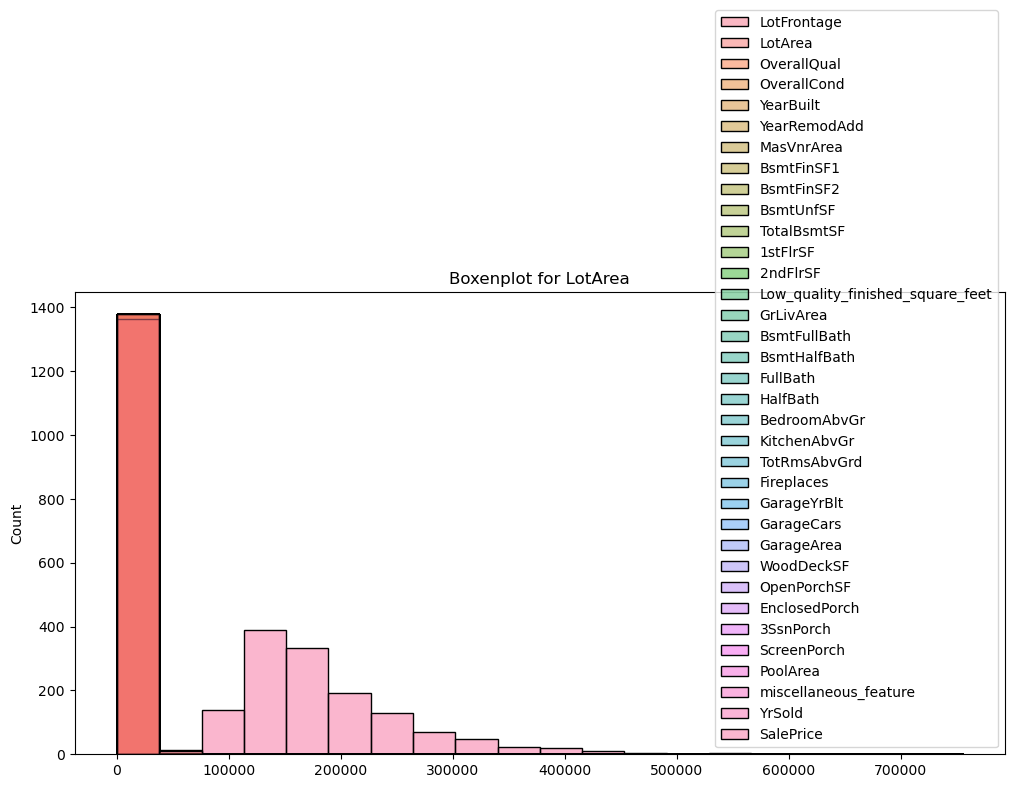

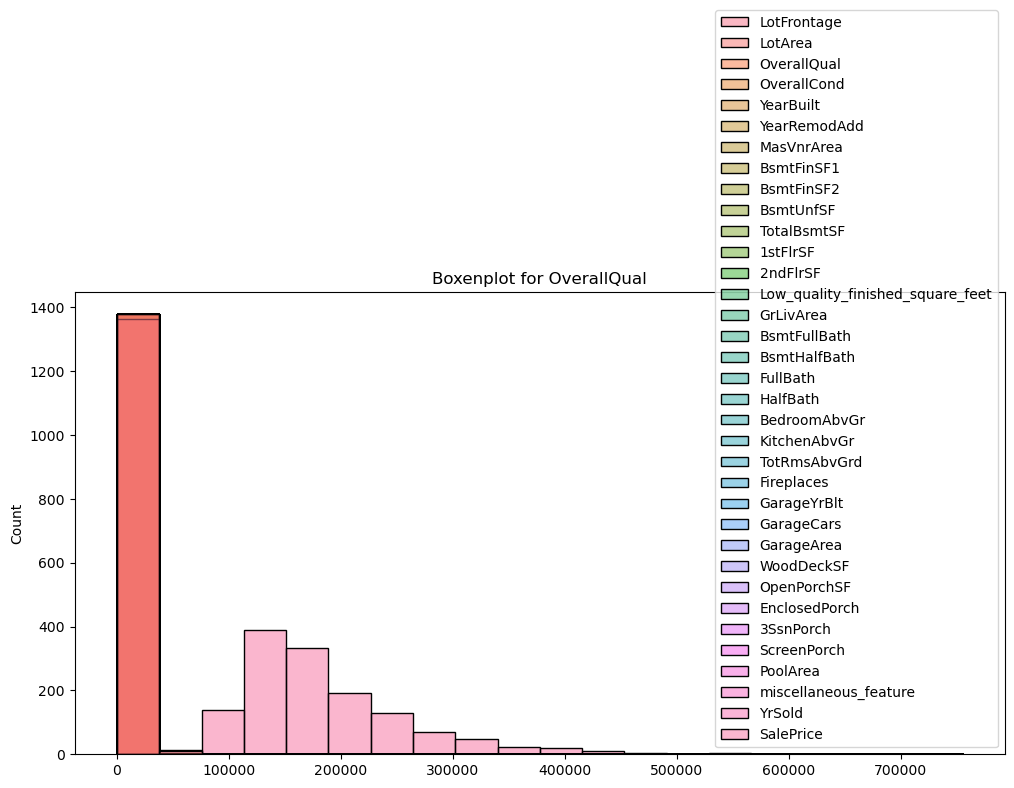

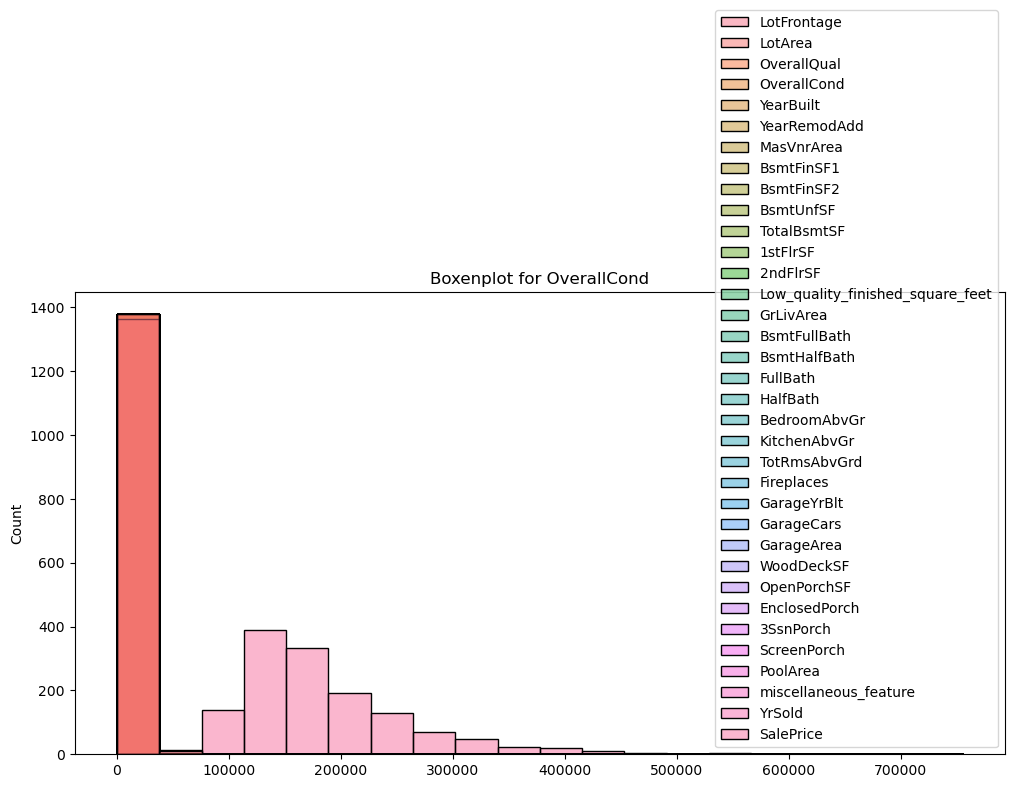

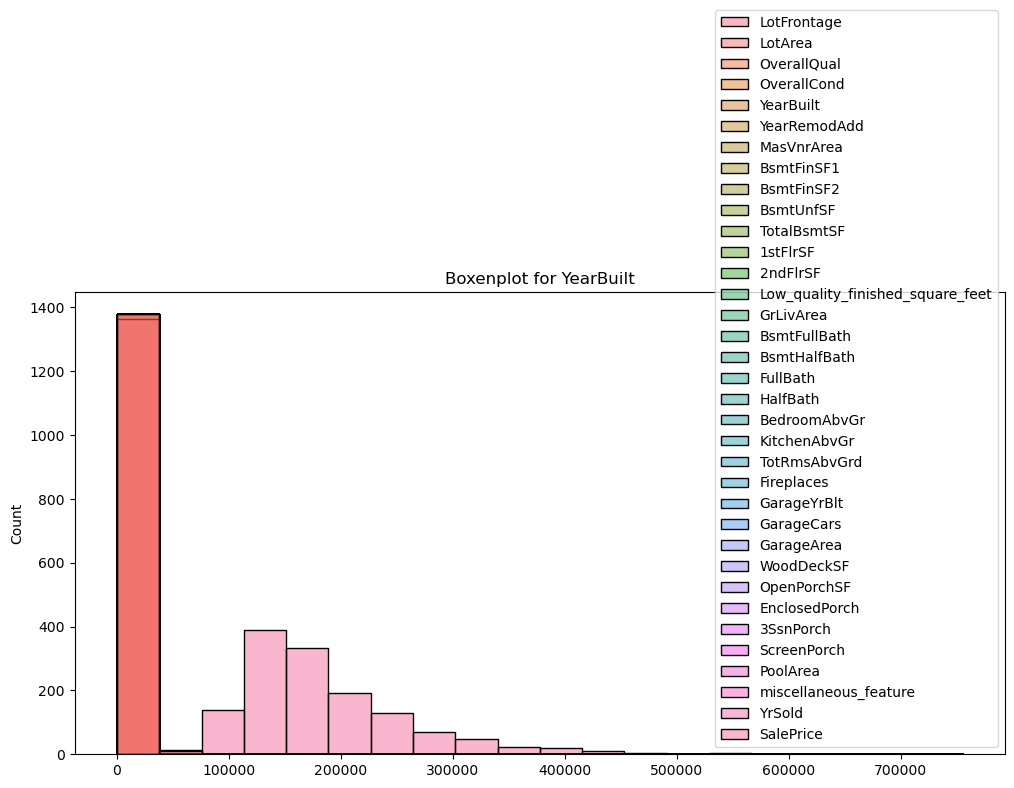

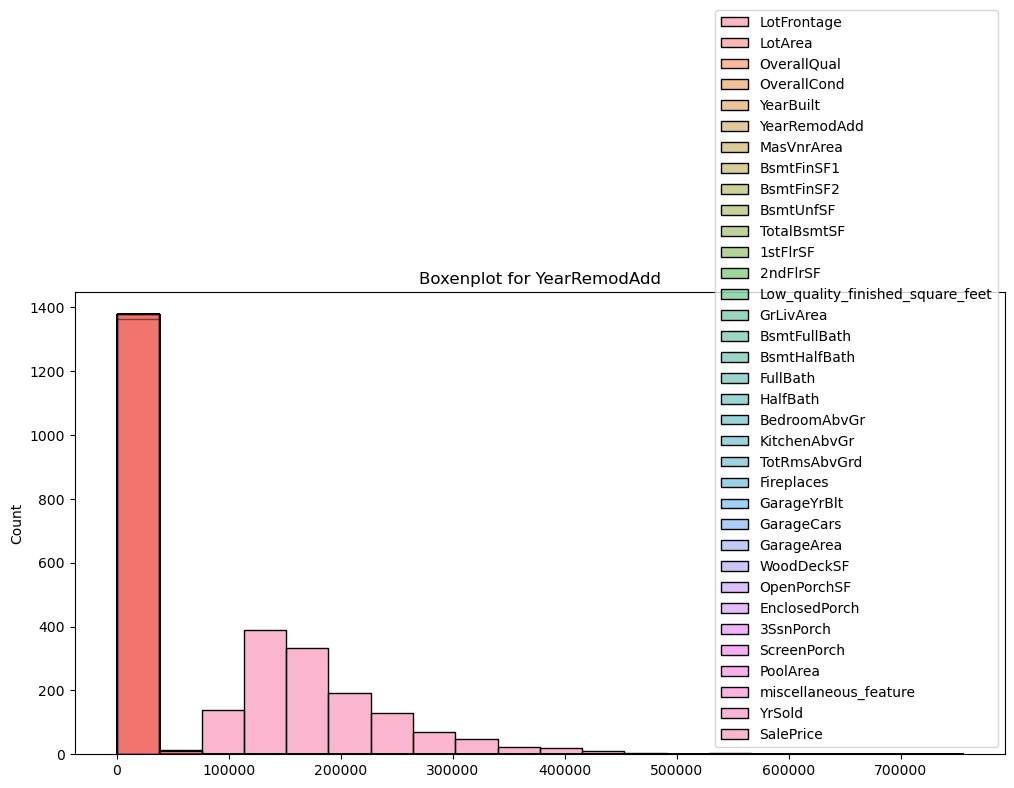

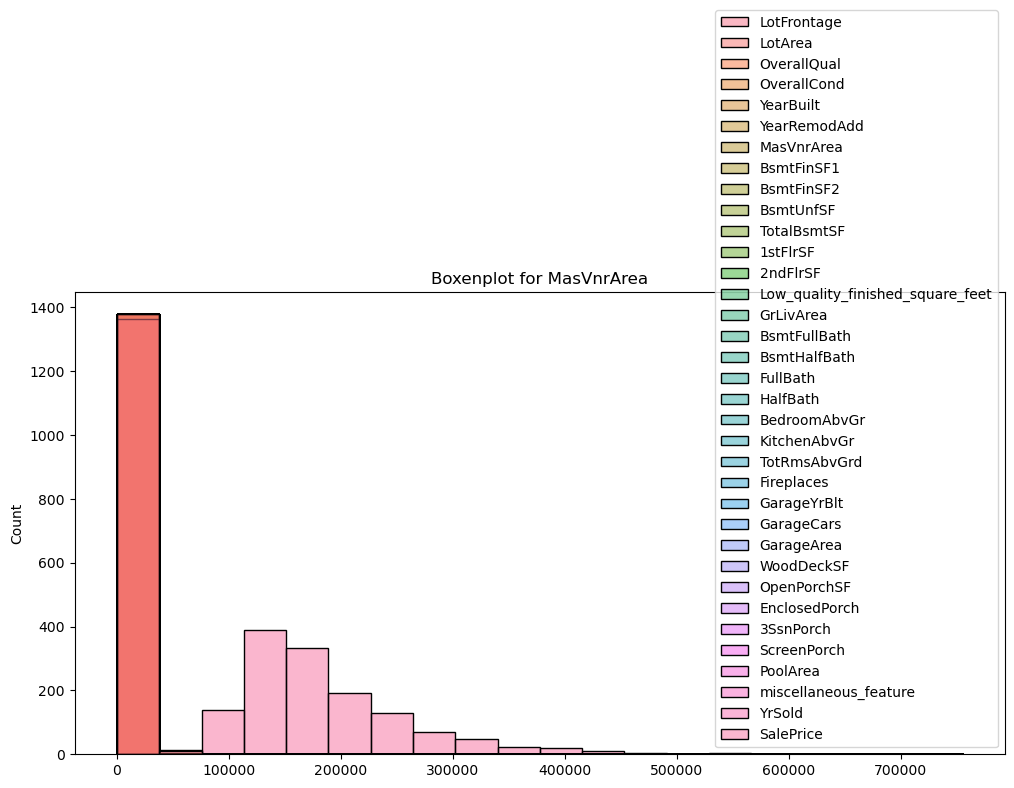

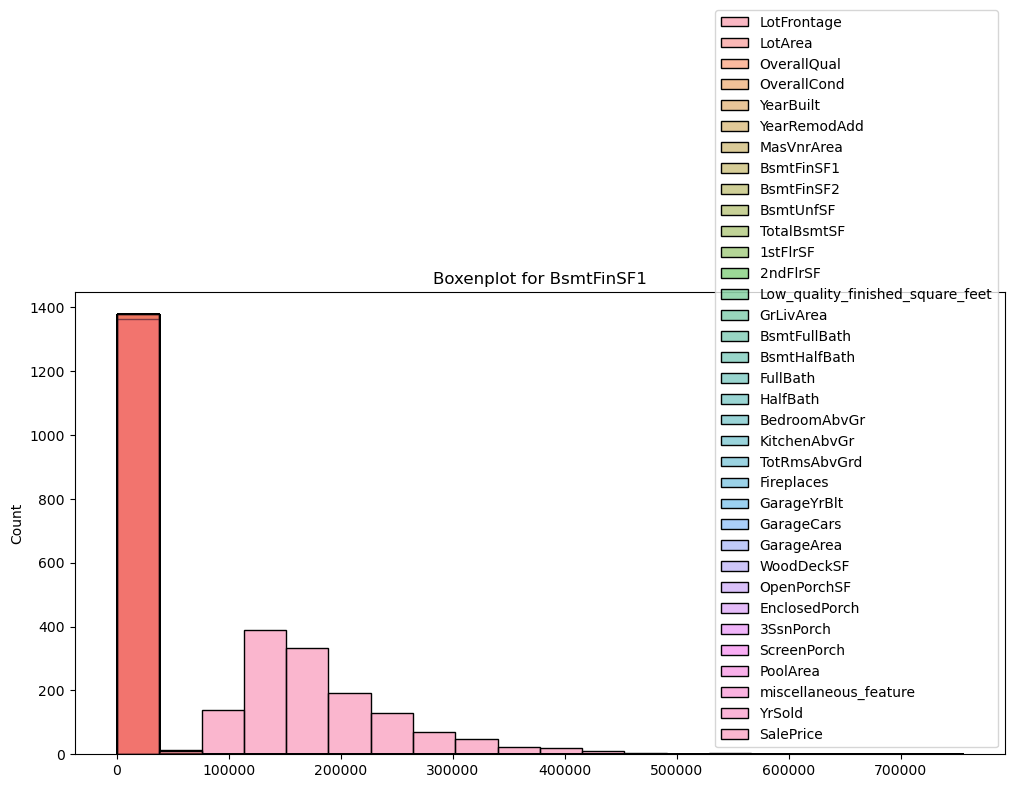

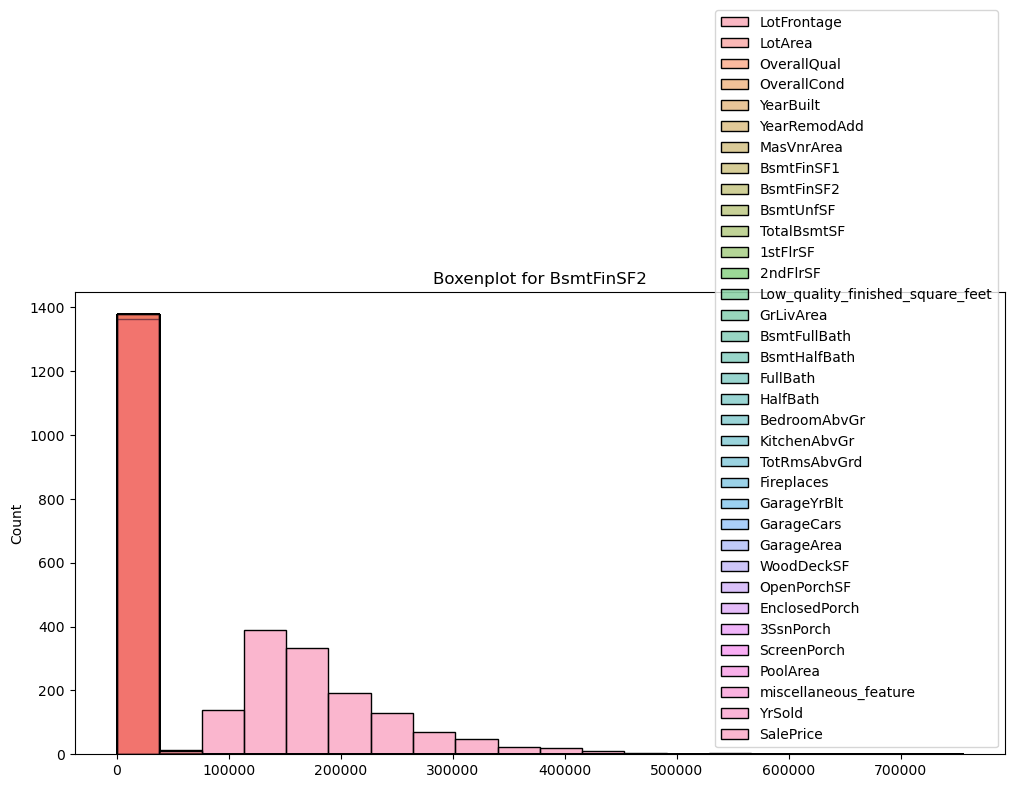

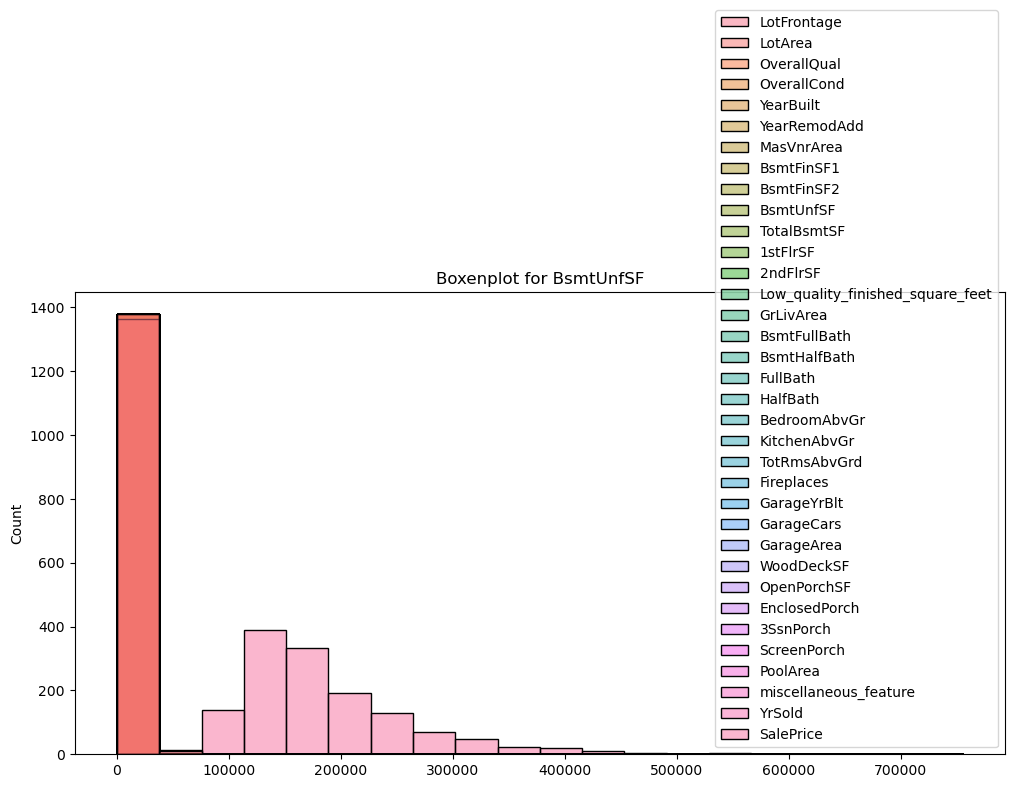

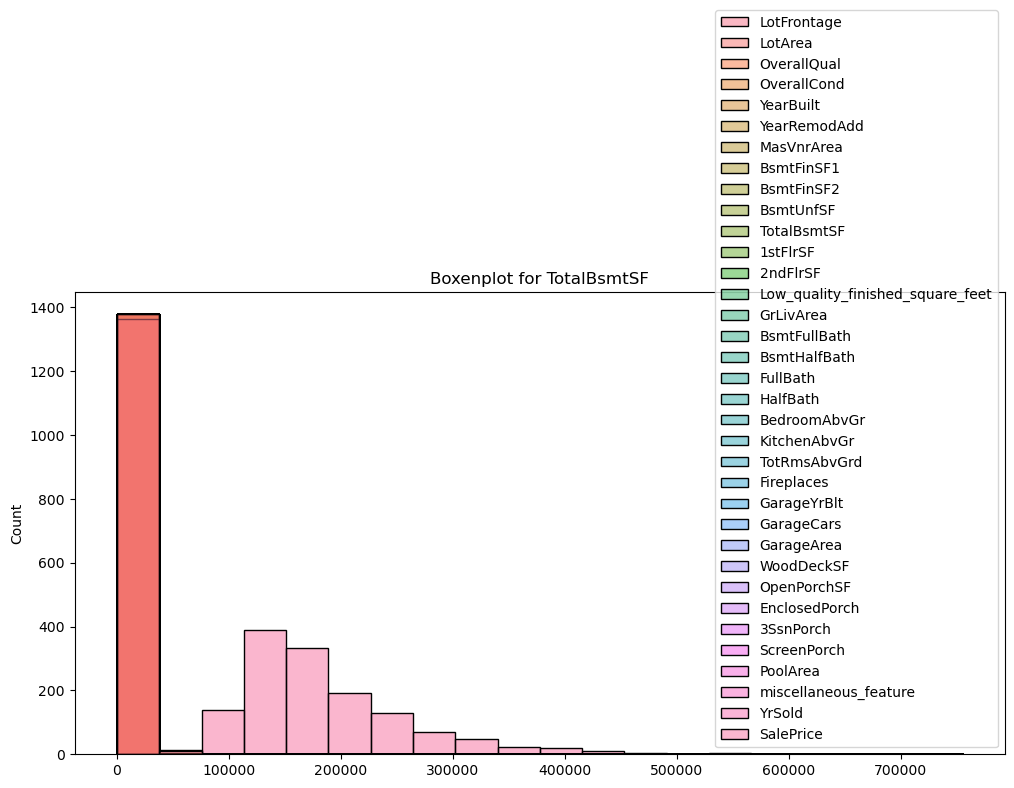

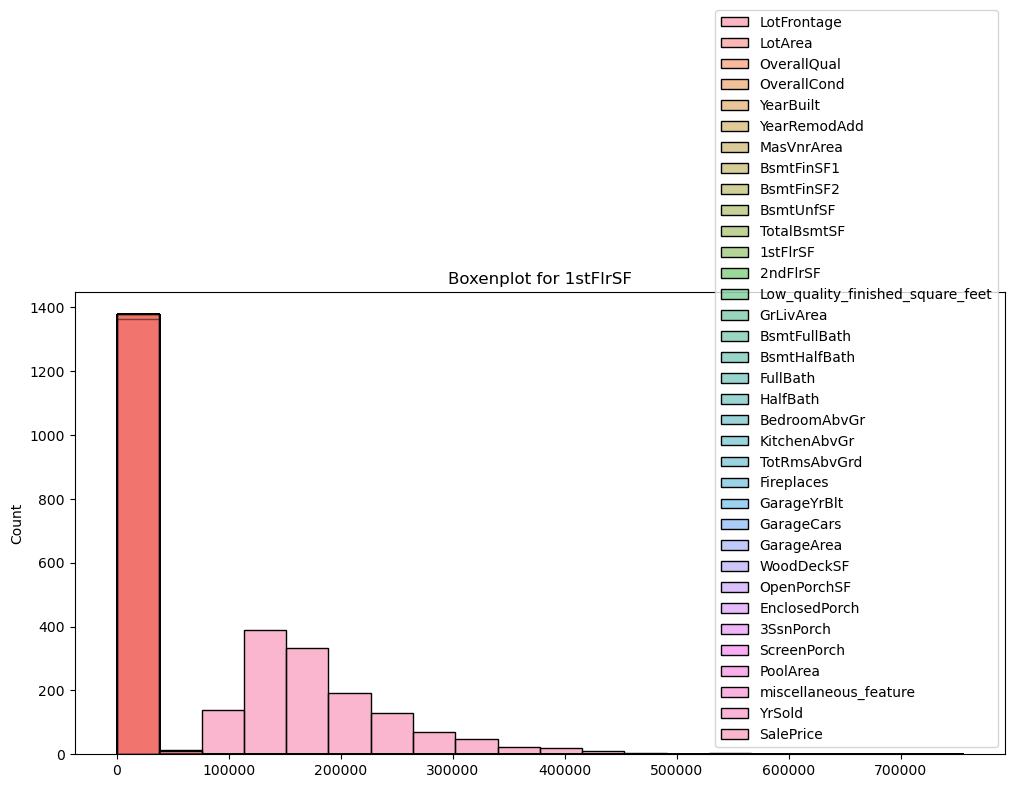

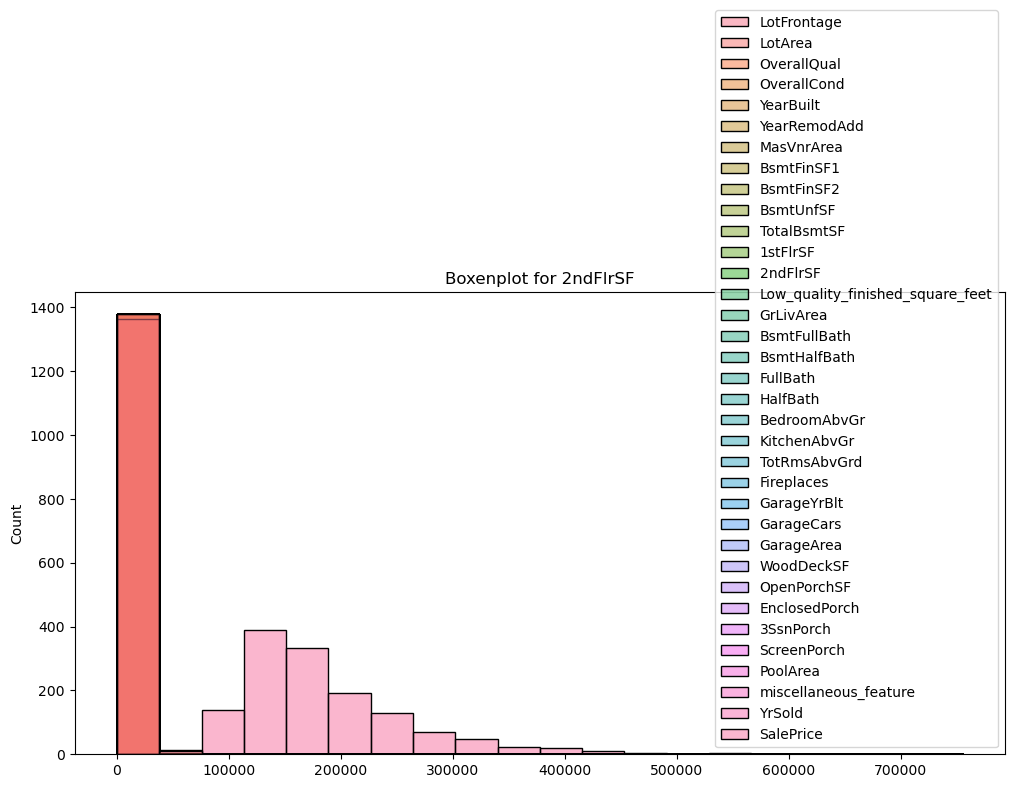

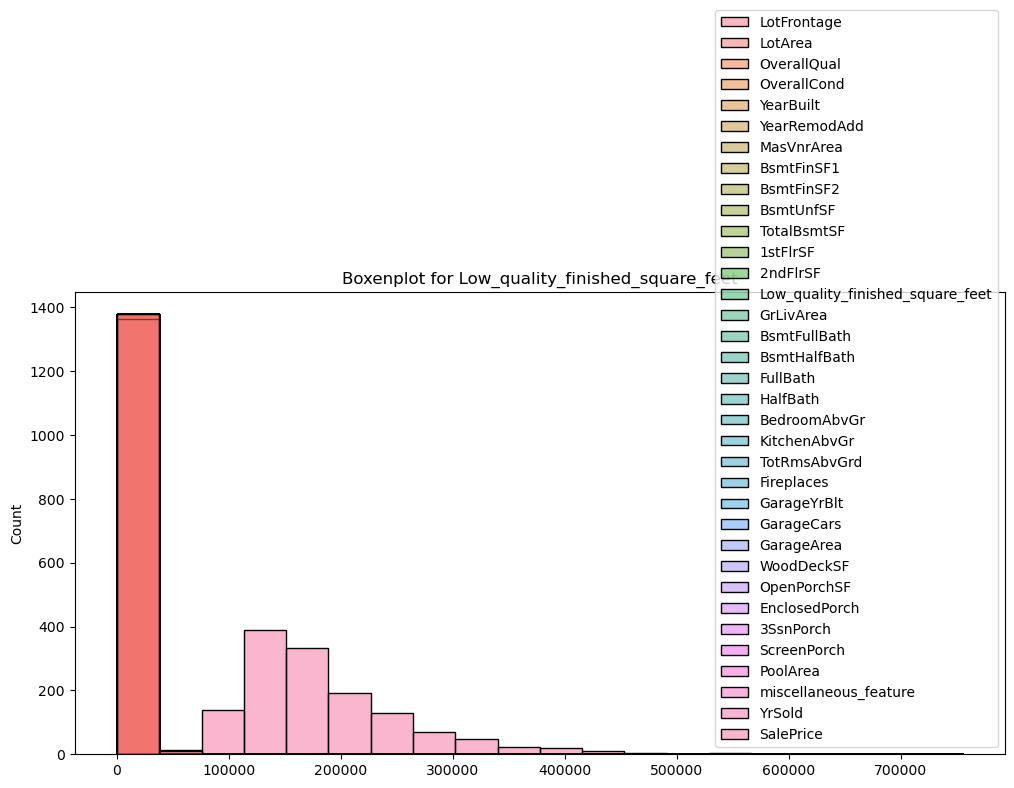

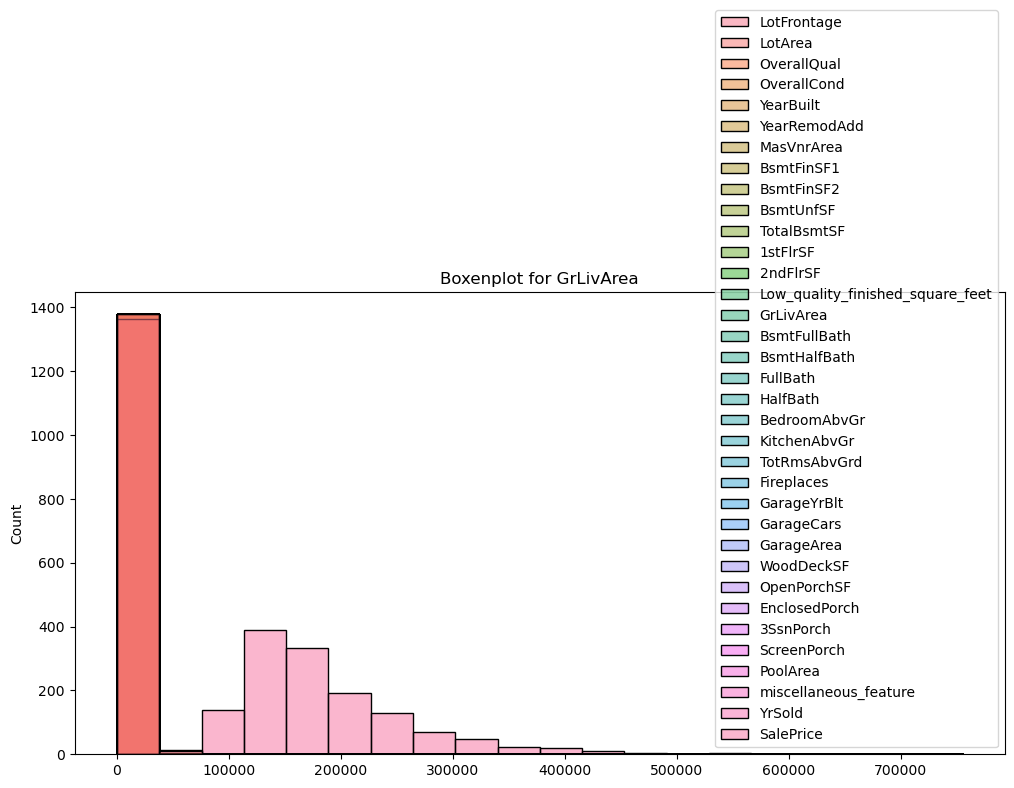

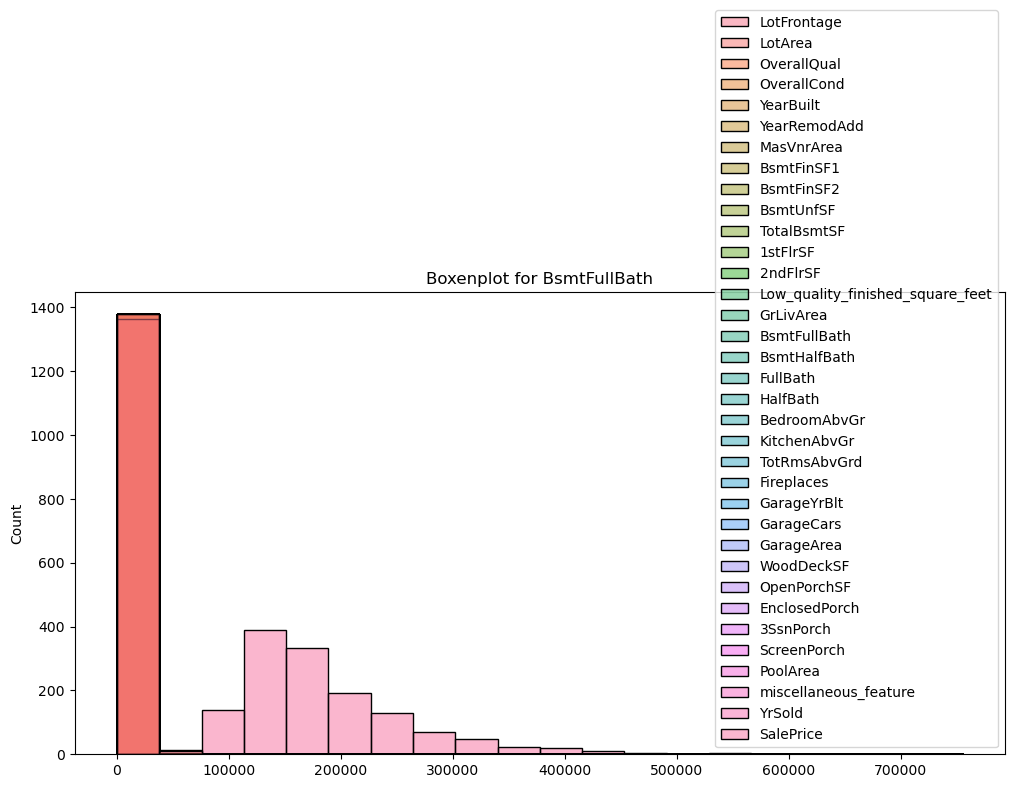

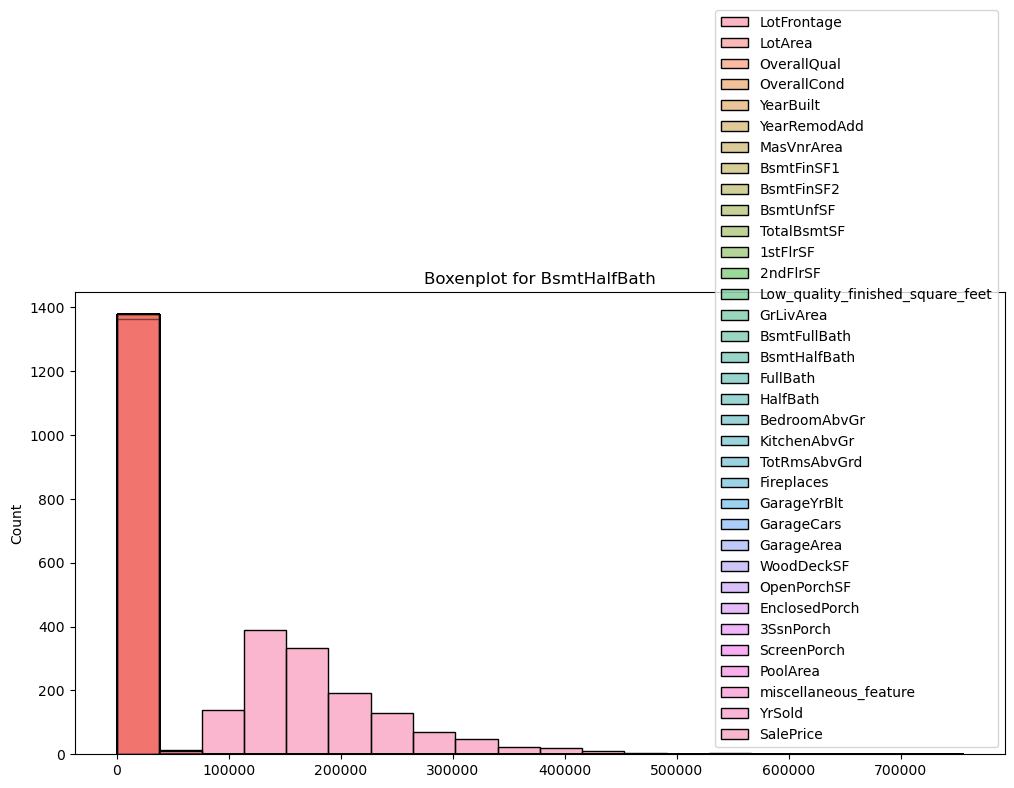

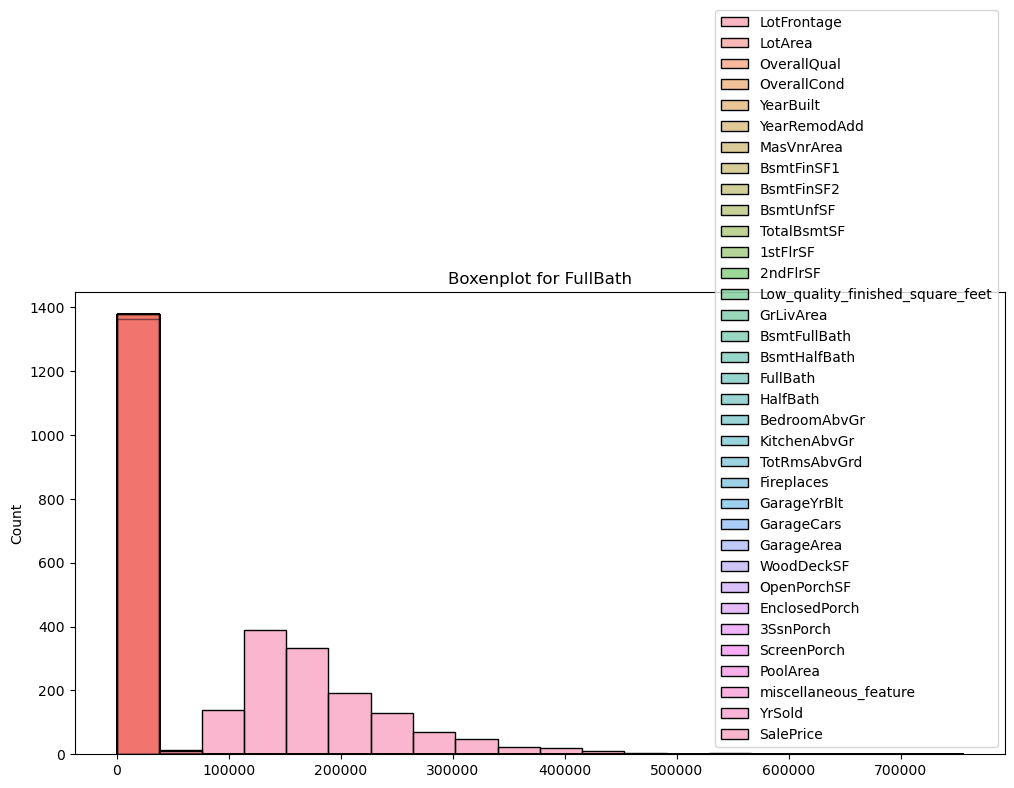

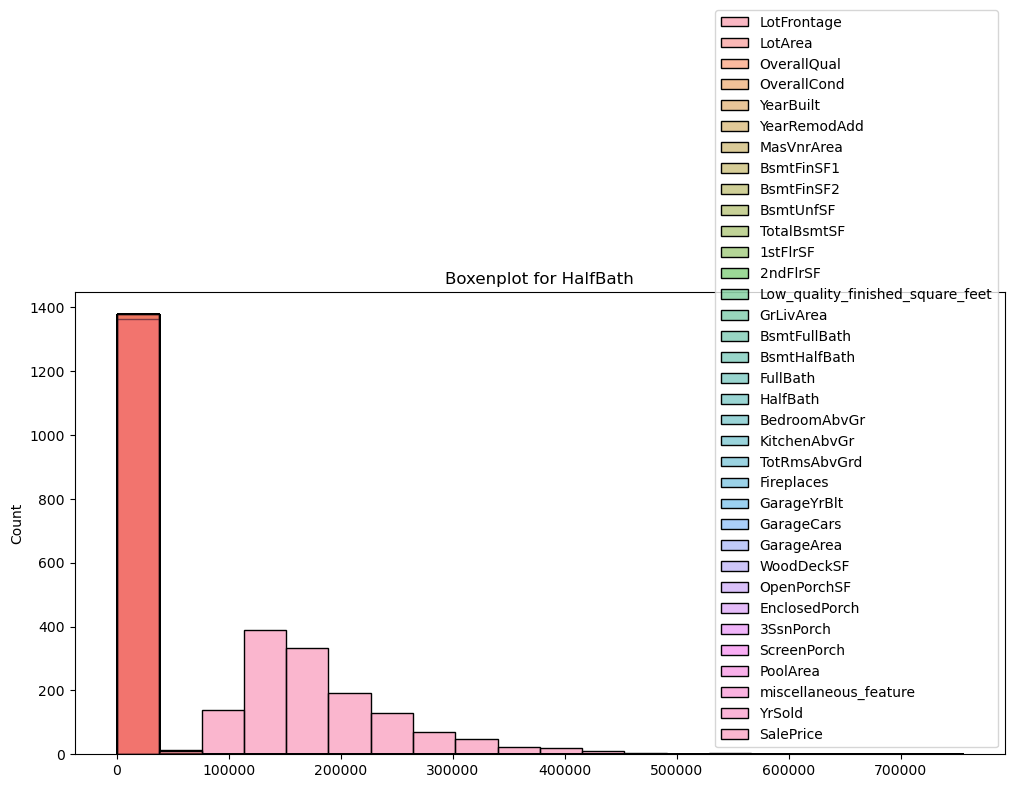

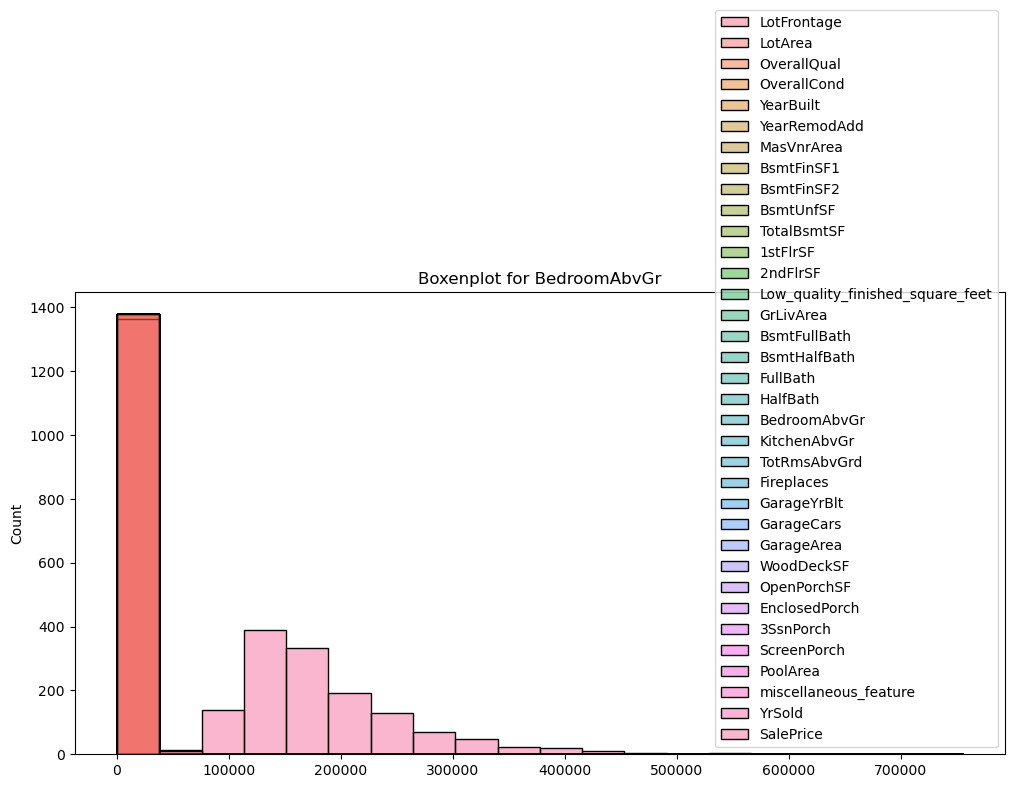

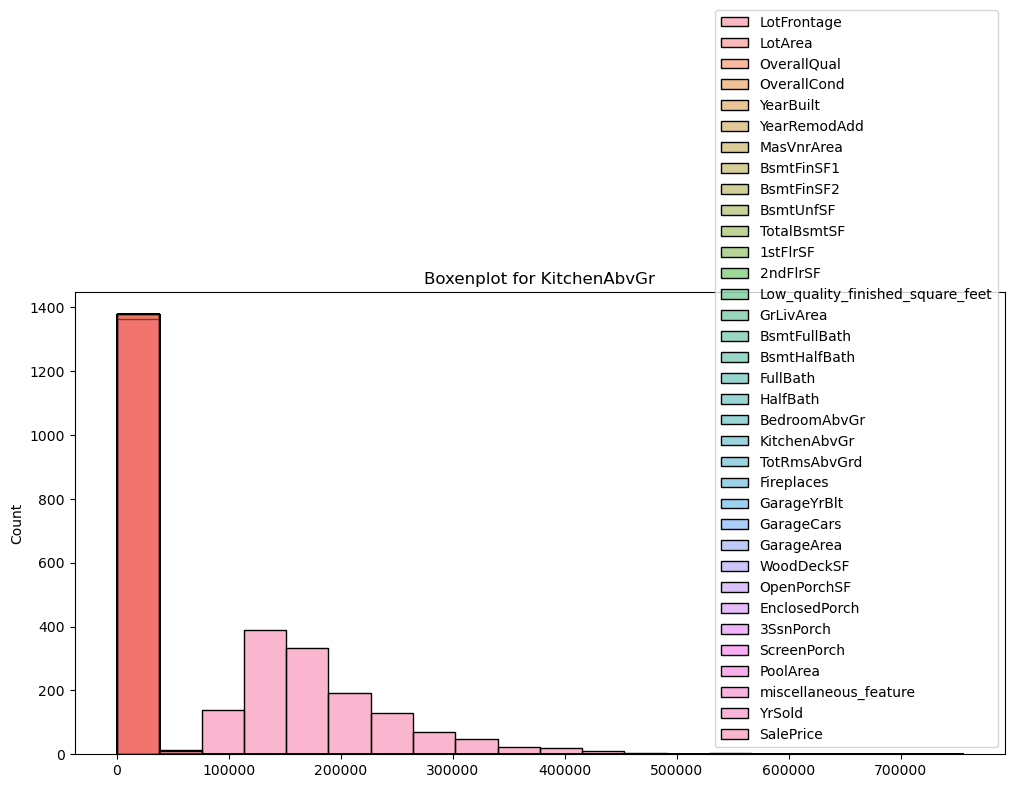

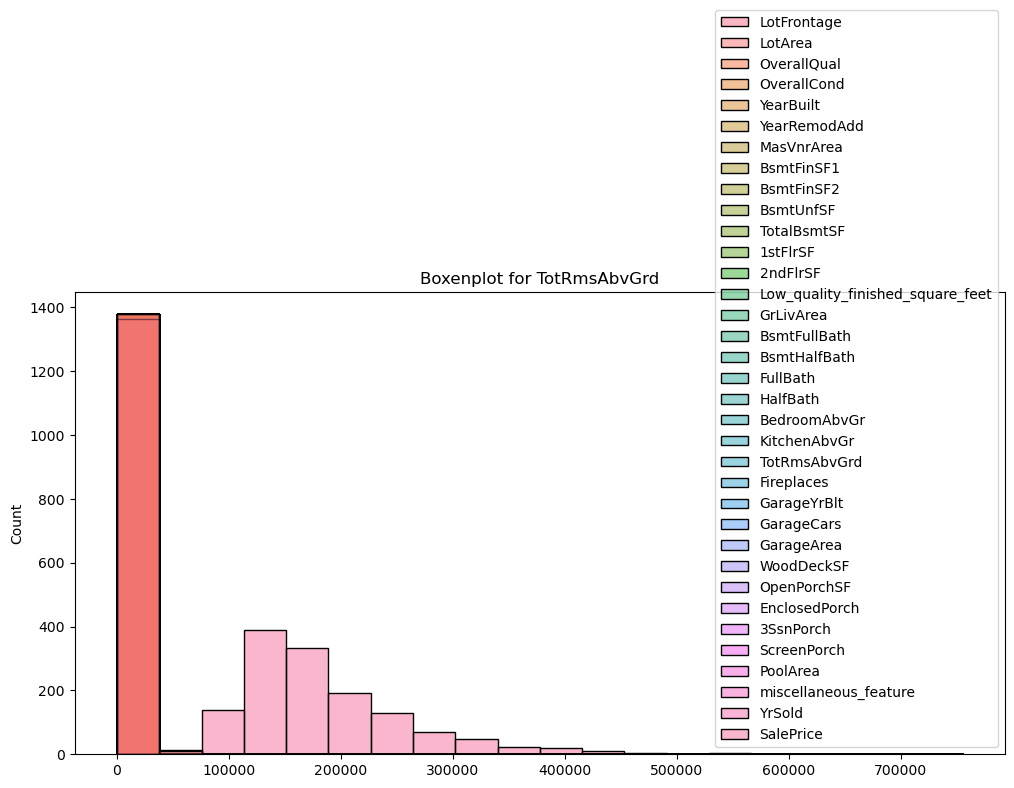

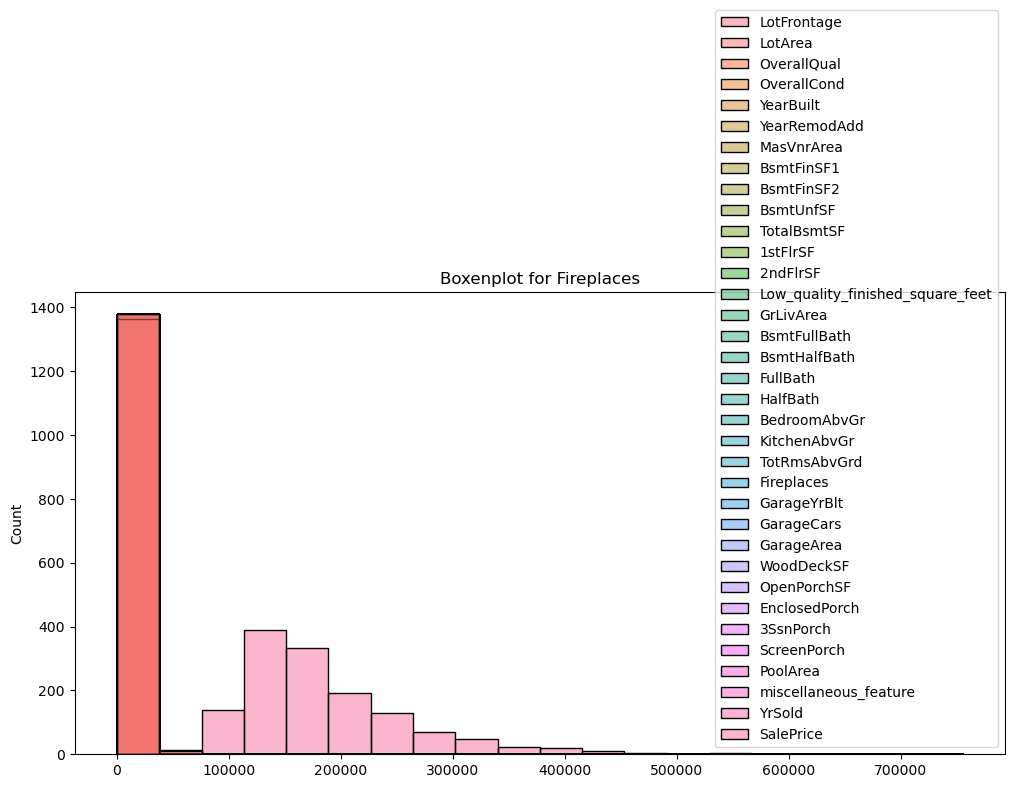

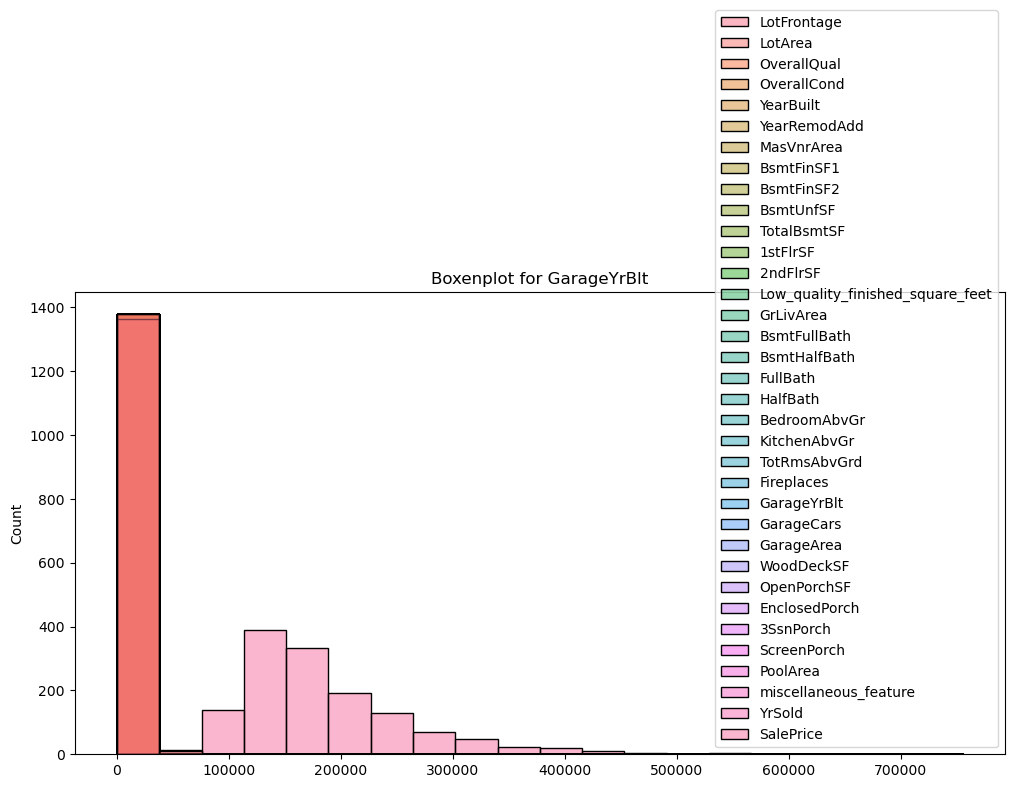

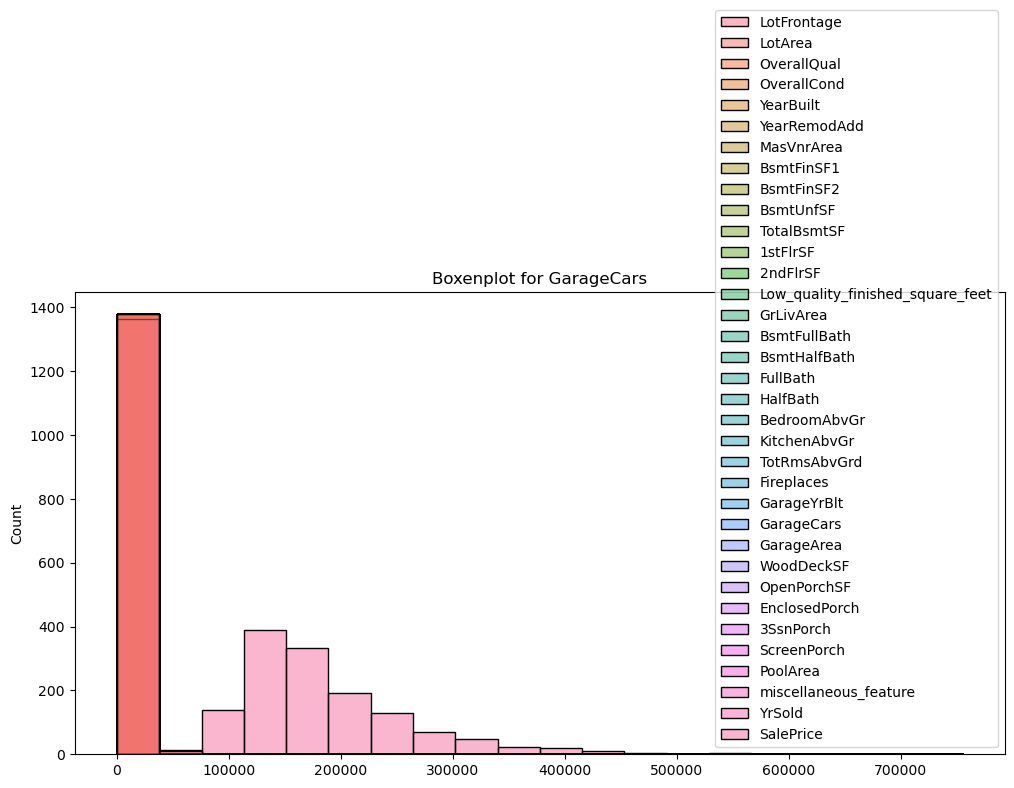

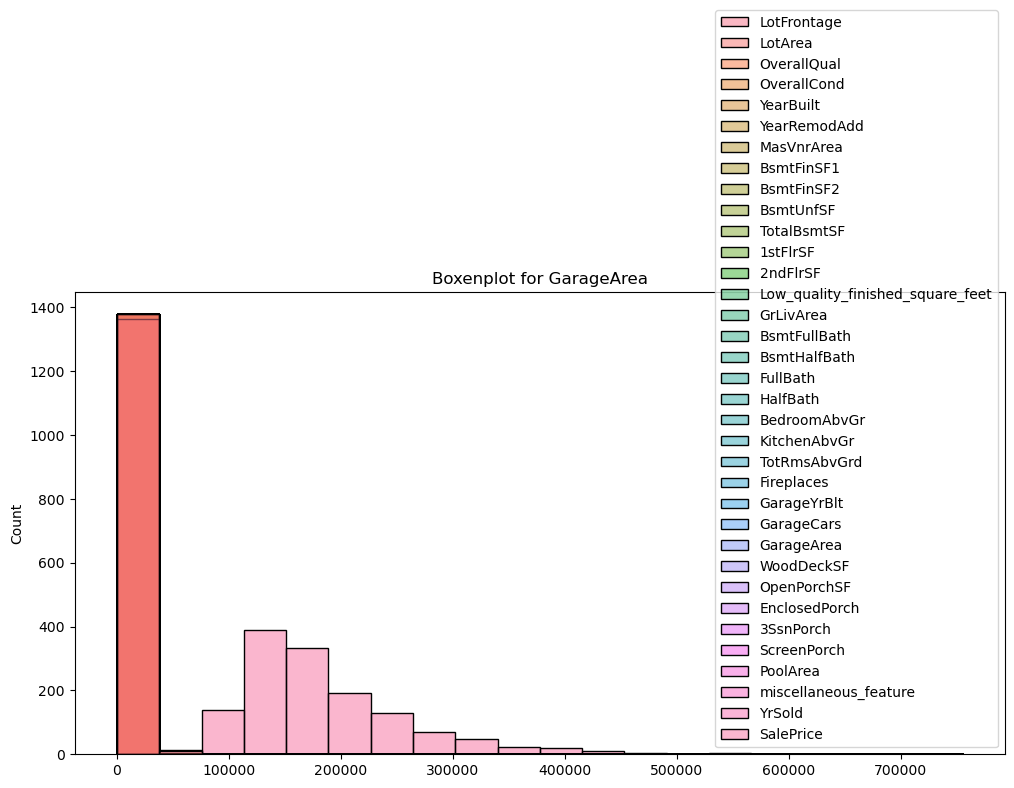

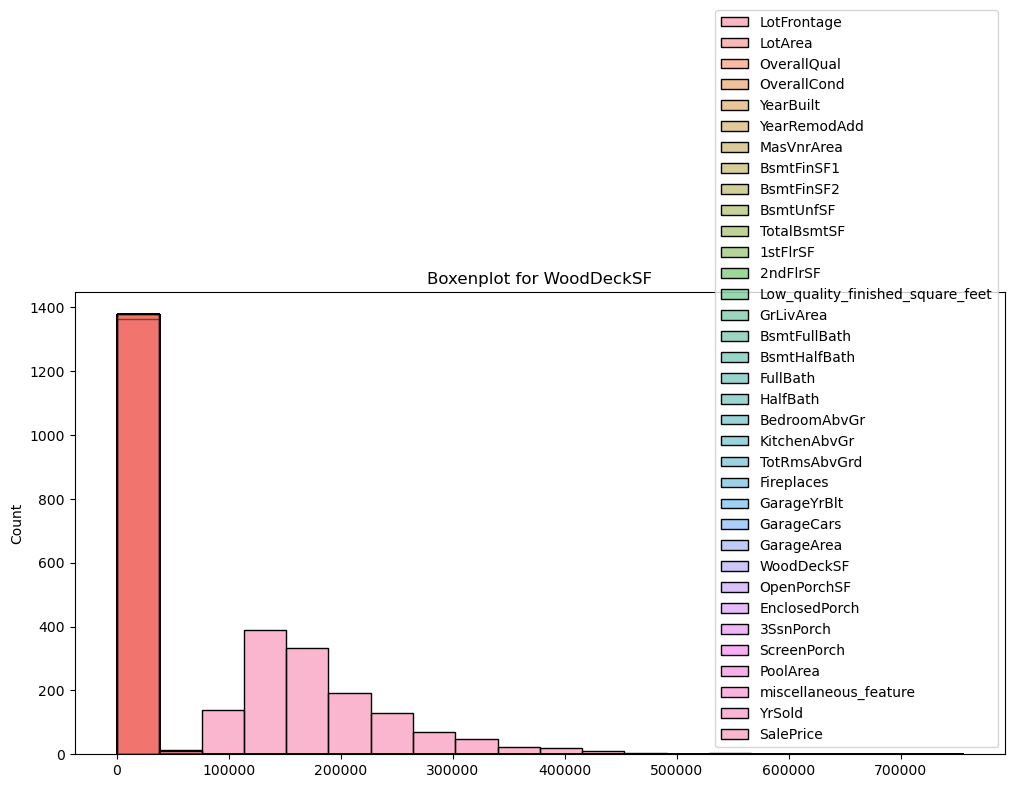

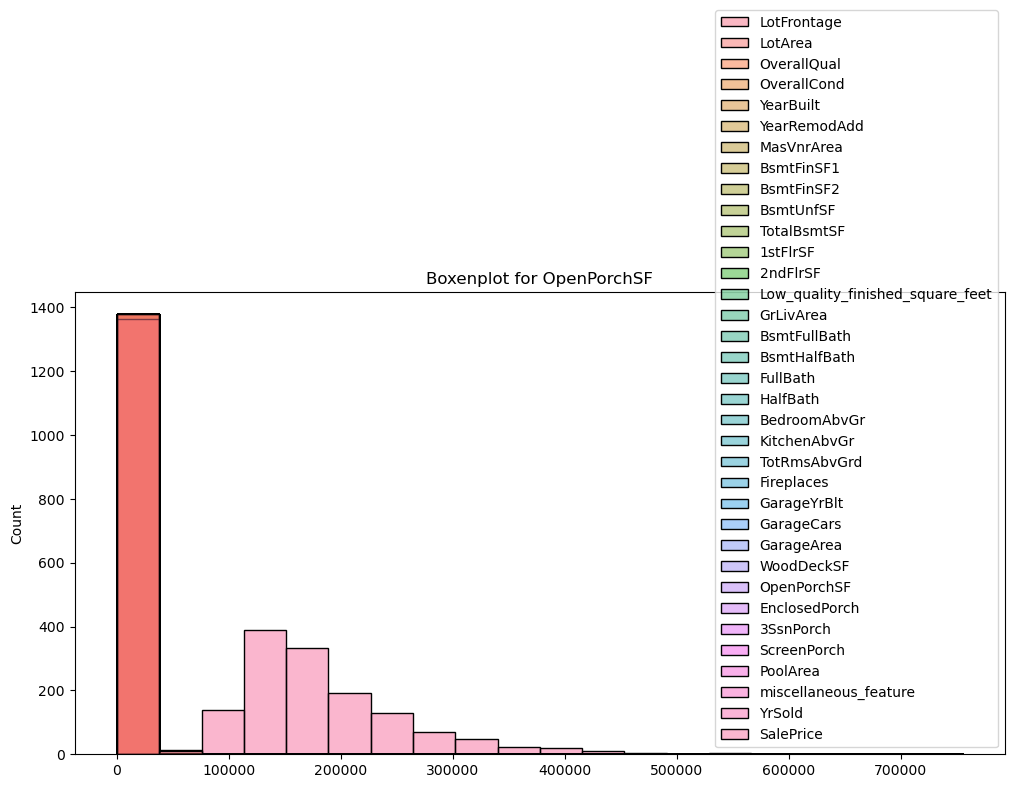

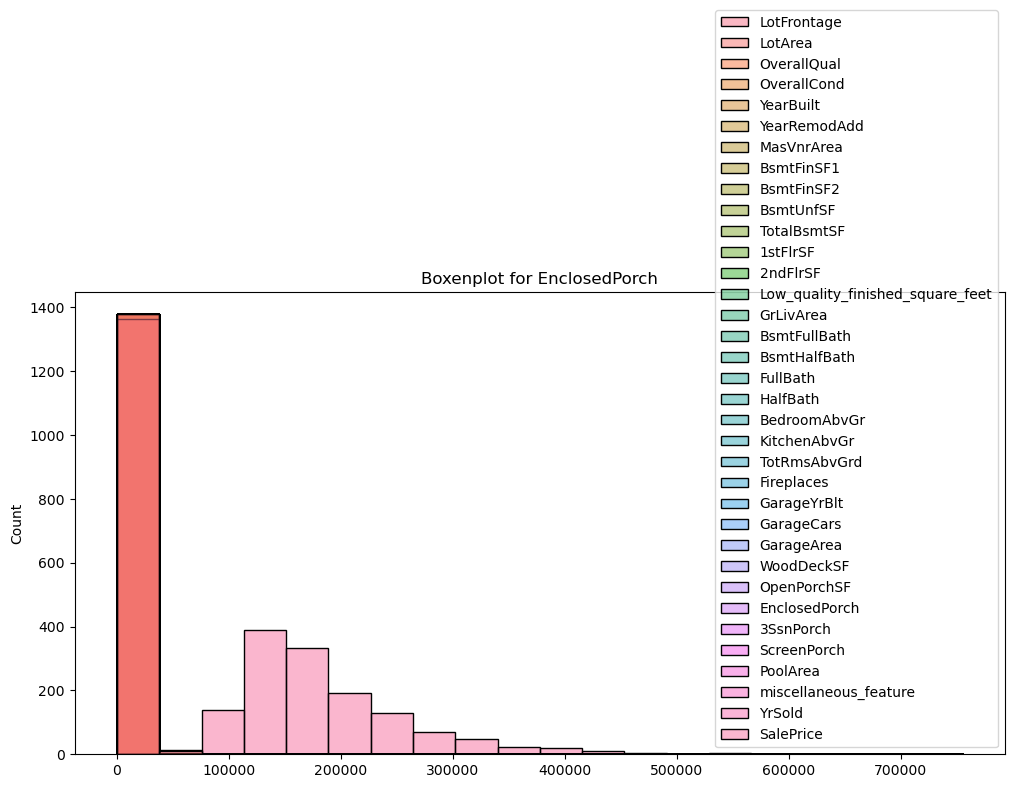

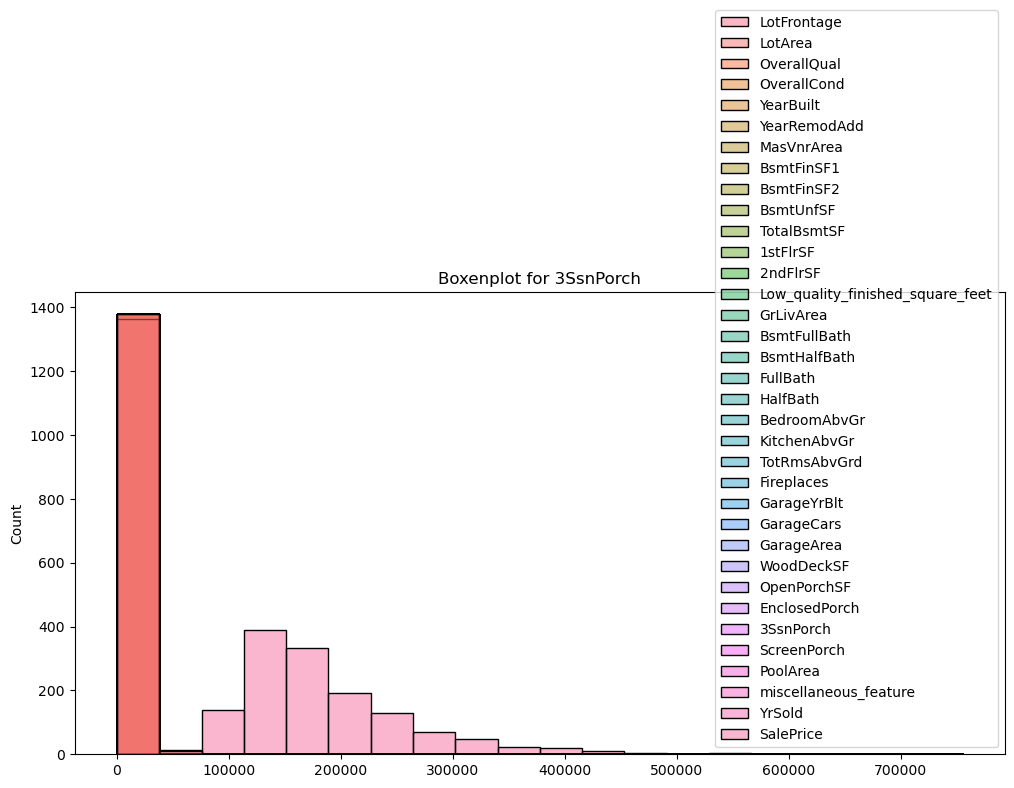

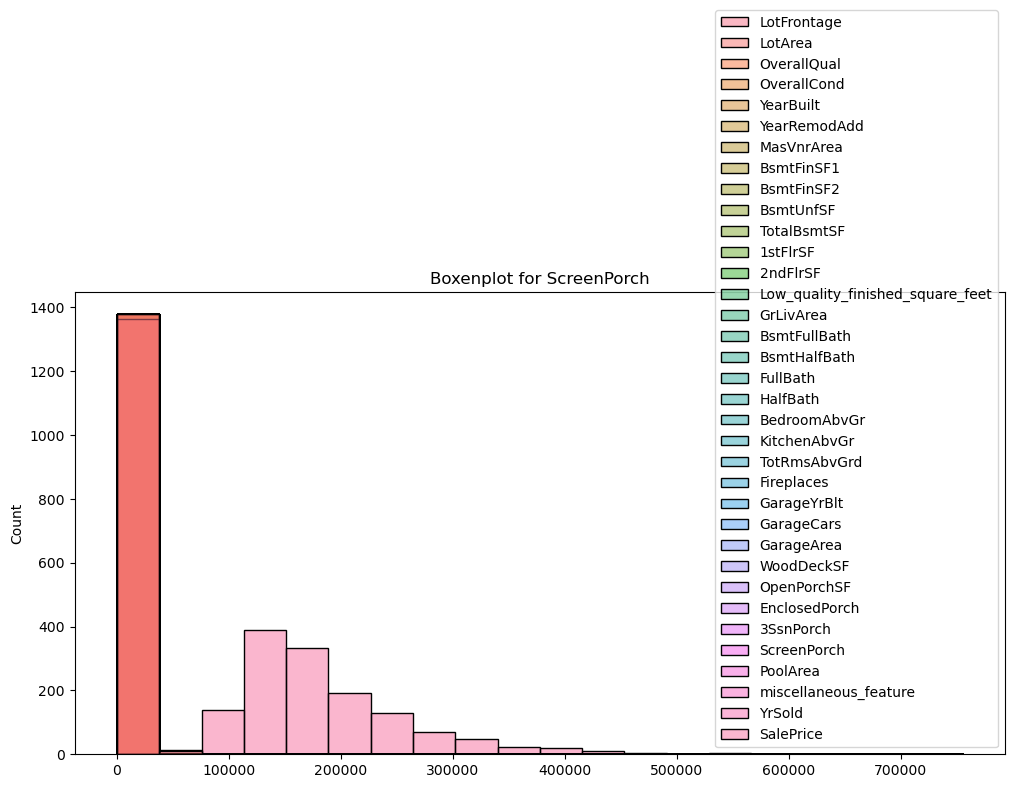

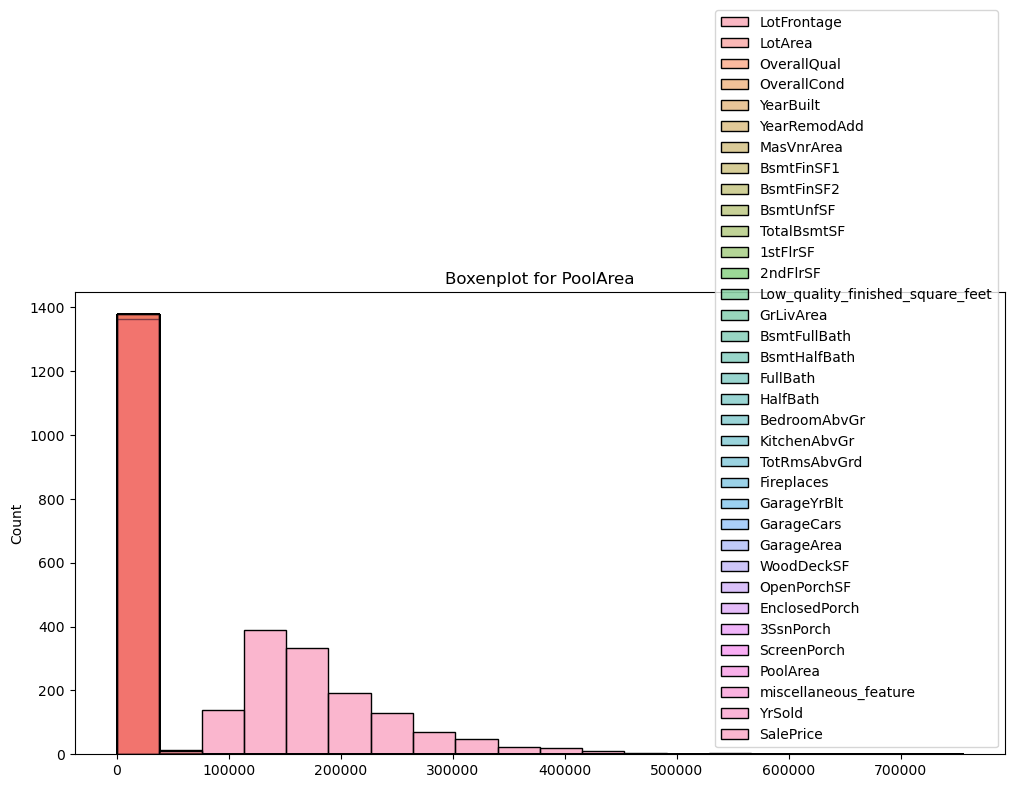

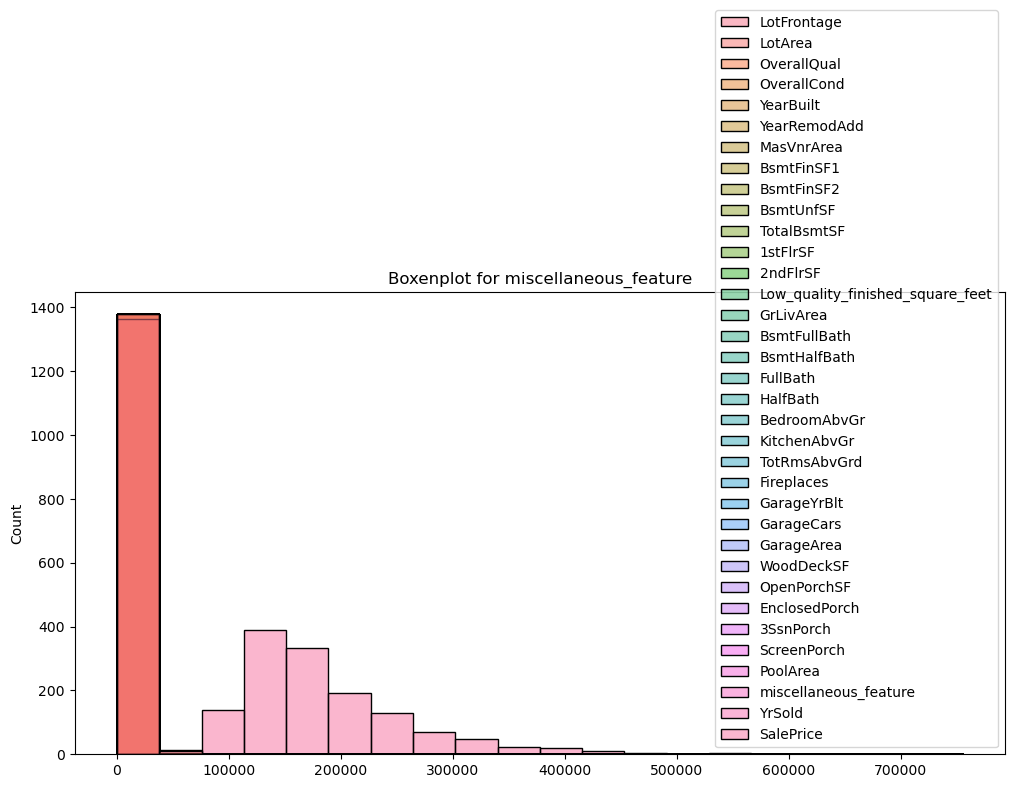

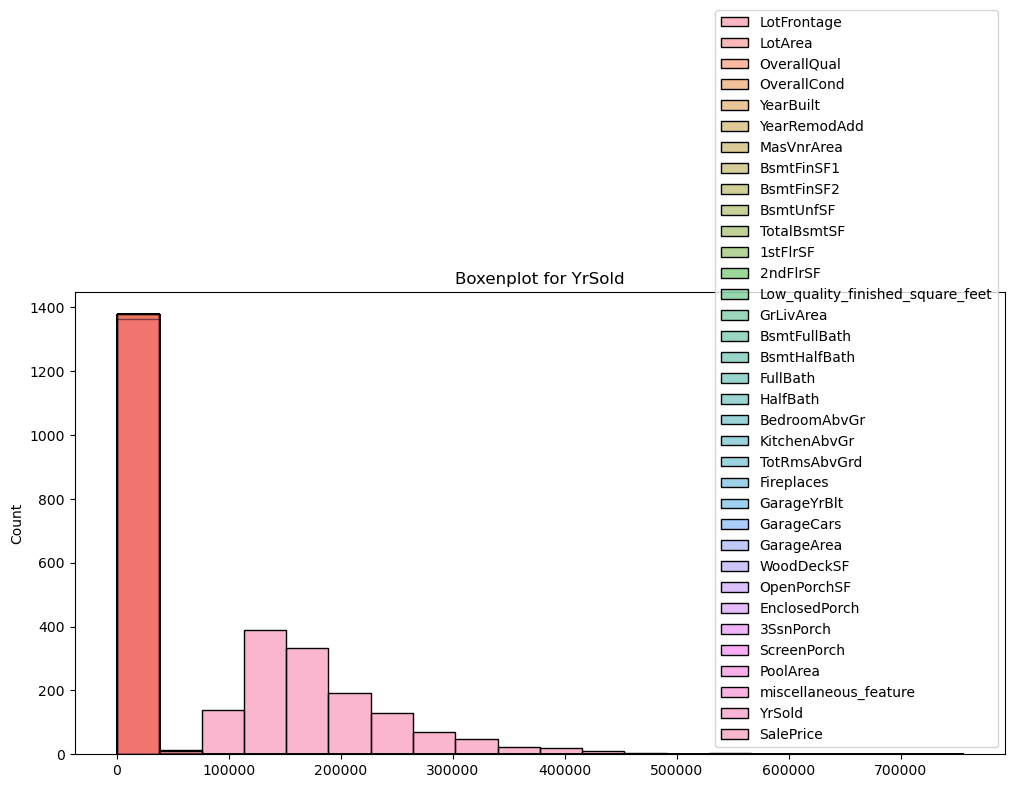

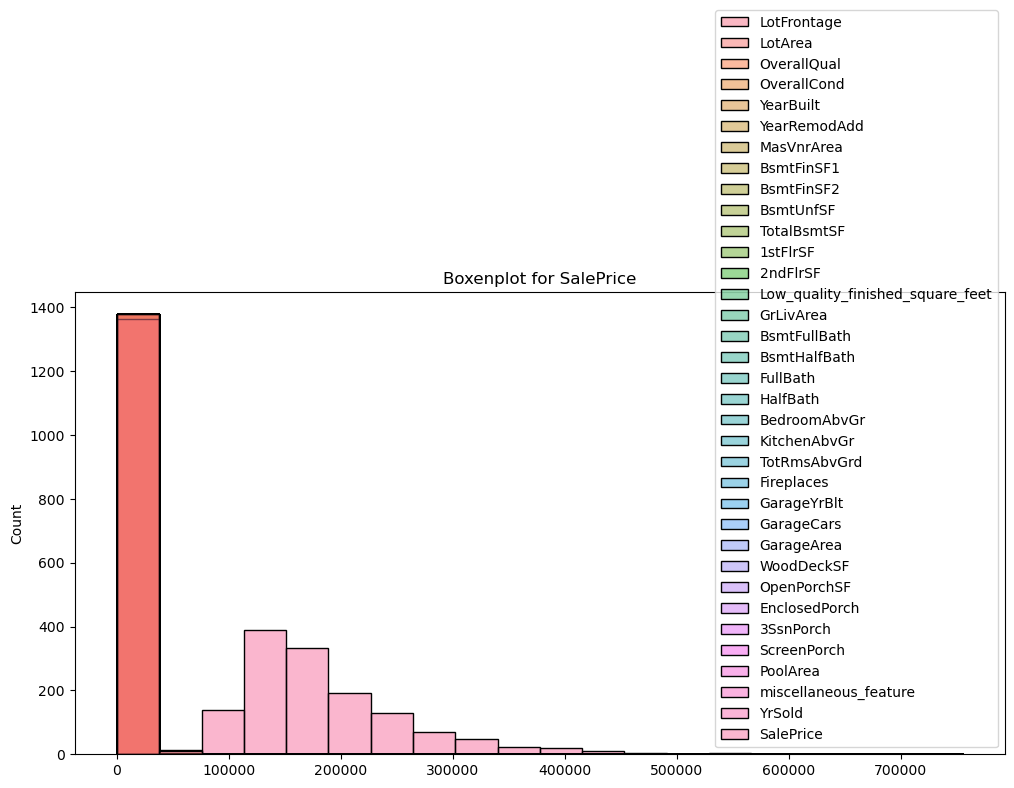

In [156]:
for column in exclude_housing_data.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(exclude_housing_data, bins=20)
    plt.title(f'Boxenplot for {column}')
    plt.show()